<a href="https://colab.research.google.com/github/Fazlibeqir/Timski-Proekt/blob/main/train_v1_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup & Imports

In [1]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 103.5 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import torch
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


If locally needs GPU

In [3]:
# Check GPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


## Dataset Check (Optional)
If you want to double-check that your dataset is correctly placed and has the expected files:

/content/drive/MyDrive/Insect Detection/dataset.zip

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
!ls -lh /content/drive/MyDrive/Insect\ Detection/

total 4.2G
-rw------- 1 root root 4.2G Jun  9 17:42 cleaned_dataset.zip
-rw------- 1 root root  276 Jun  9 17:20 compare_all_versions.ipynb
-rw------- 1 root root 1.6K Jun 10 17:22 compared_models.ipynb
-rw------- 1 root root  15K May 30 22:00 fetch_data.ipynb
-rw------- 1 root root  324 May 29 23:17 test_and_eval.ipynb
-rw------- 1 root root 7.3K Jun 11 17:12 train_v1_baseline.ipynb
-rw------- 1 root root  324 May 29 23:16 train_v2_augmented.ipynb
-rw------- 1 root root 1.5M Jun 11 17:12 train_v3_bigger_model.ipynb
drwx------ 2 root root 4.0K May 28 16:56 utils
-rw------- 1 root root 909K May 28 16:44 YOLO8.ipynb


In [6]:
!cp /content/drive/MyDrive/Insect\ Detection/cleaned_dataset.zip .

In [7]:
!unzip -q cleaned_dataset.zip -d .

In [8]:
from pathlib import Path

#dataset is extracted into /content/dataset/content/dataset
base_path = Path("/content/dataset/content/dataset")
for split in ['train','test', 'val']:
    split_path = base_path / split
    image_count = len(list(split_path.rglob('*.jpg')))
    print(f"{split.capitalize()} images: {image_count}")

Train images: 1766
Test images: 384
Val images: 391


## Load and Train the Baseline Model

In [9]:
# Load YOLOv8 baseline
model = YOLO('yolov8s-cls.pt')


# Train the model
model.train(
    data=base_path,
    epochs=10,
    imgsz=224,
    batch=64,
    device=0 if torch.cuda.is_available() else 'cpu',
    name='yolov8s-cls_baseline' # This saves under runs/classify/yolov8s-cls_baseline
)

100%|██████████| 12.3M/12.3M [00:00<00:00, 94.8MB/s]


Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/content/dataset, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s-cls_baseline, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

100%|██████████| 5.35M/5.35M [00:00<00:00, 112MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 61.4±34.4 MB/s, size: 427.4 KB)


train: Scanning /content/dataset/content/dataset/train... 3514 images, 0 corrupt: 100%|██████████| 3514/3514 [00:04<00:00, 828.29it/s]

train: New cache created: /content/dataset/content/dataset/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1454.2±1266.5 MB/s, size: 1448.8 KB)


val: Scanning /content/dataset/content/dataset/val... 748 images, 0 corrupt: 100%|██████████| 748/748 [00:00<00:00, 2674.00it/s]

val: New cache created: /content/dataset/content/dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000161, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/yolov8s-cls_baseline
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10      1.34G      4.107         64        224:   4%|▎         | 2/55 [00:04<01:33,  1.76s/it]


100%|██████████| 755k/755k [00:00<00:00, 26.3MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.30s/it]

                   all     0.0281      0.152



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:17<00:00,  2.92s/it]

                   all      0.118      0.332



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.08s/it]

                   all      0.211      0.517



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.28s/it]

                   all      0.277       0.63



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:18<00:00,  3.02s/it]

                   all      0.317       0.67



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:13<00:00,  2.23s/it]

                   all      0.372       0.71



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:12<00:00,  2.04s/it]

                   all      0.396      0.742



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:20<00:00,  3.34s/it]

                   all      0.408      0.759



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.54s/it]

                   all      0.425      0.773



      Epoch    GPU_mem       loss  Instances       Size


      10/10      1.79G       2.07         58        224: 100%|██████████| 55/55 [02:09<00:00,  2.36s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:15<00:00,  2.54s/it]

                   all      0.433      0.782



10 epochs completed in 0.398 hours.
Optimizer stripped from runs/classify/yolov8s-cls_baseline/weights/last.pt, 10.4MB
Optimizer stripped from runs/classify/yolov8s-cls_baseline/weights/best.pt, 10.4MB

Validating runs/classify/yolov8s-cls_baseline/weights/best.pt...
Ultralytics 8.3.153 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-cls summary (fused): 30 layers, 5,149,498 parameters, 0 gradients, 12.5 GFLOPs
train: /content/dataset/content/dataset/train... found 3514 images in 58 classes ✅ 
ERROR ❌ val: /content/dataset/content/dataset/val... found 748 images in 57 classes (requires 58 classes, not 57)
ERROR ❌ test: /content/dataset/content/dataset/test... found 748 images in 57 classes (requires 58 classes, not 57)


               classes   top1_acc   top5_acc:  33%|███▎      | 2/6 [00:05<00:09,  2.28s/it]


  0%|          | 0.00/22.2M [00:00<?, ?B/s]
100%|██████████| 22.2M/22.2M [00:00<00:00, 106MB/s] 
               classes   top1_acc   top5_acc: 100%|██████████| 6/6 [00:22<00:00,  3.83s/it]


                   all      0.433      0.782
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/yolov8s-cls_baseline


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7805d48794d0>
curves: []
curves_results: []
fitness: 0.6076203137636185
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.4331550896167755, 'metrics/accuracy_top5': 0.7820855379104614, 'fitness': 0.6076203137636185}
save_dir: PosixPath('runs/classify/yolov8s-cls_baseline')
speed: {'preprocess': 0.09163979812846396, 'inference': 0.37197071256719877, 'loss': 0.00010938903661908966, 'postprocess': 0.00023879679119659768}
task: 'classify'
top1: 0.4331550896167755
top5: 0.7820855379104614

## View Results (Optional)

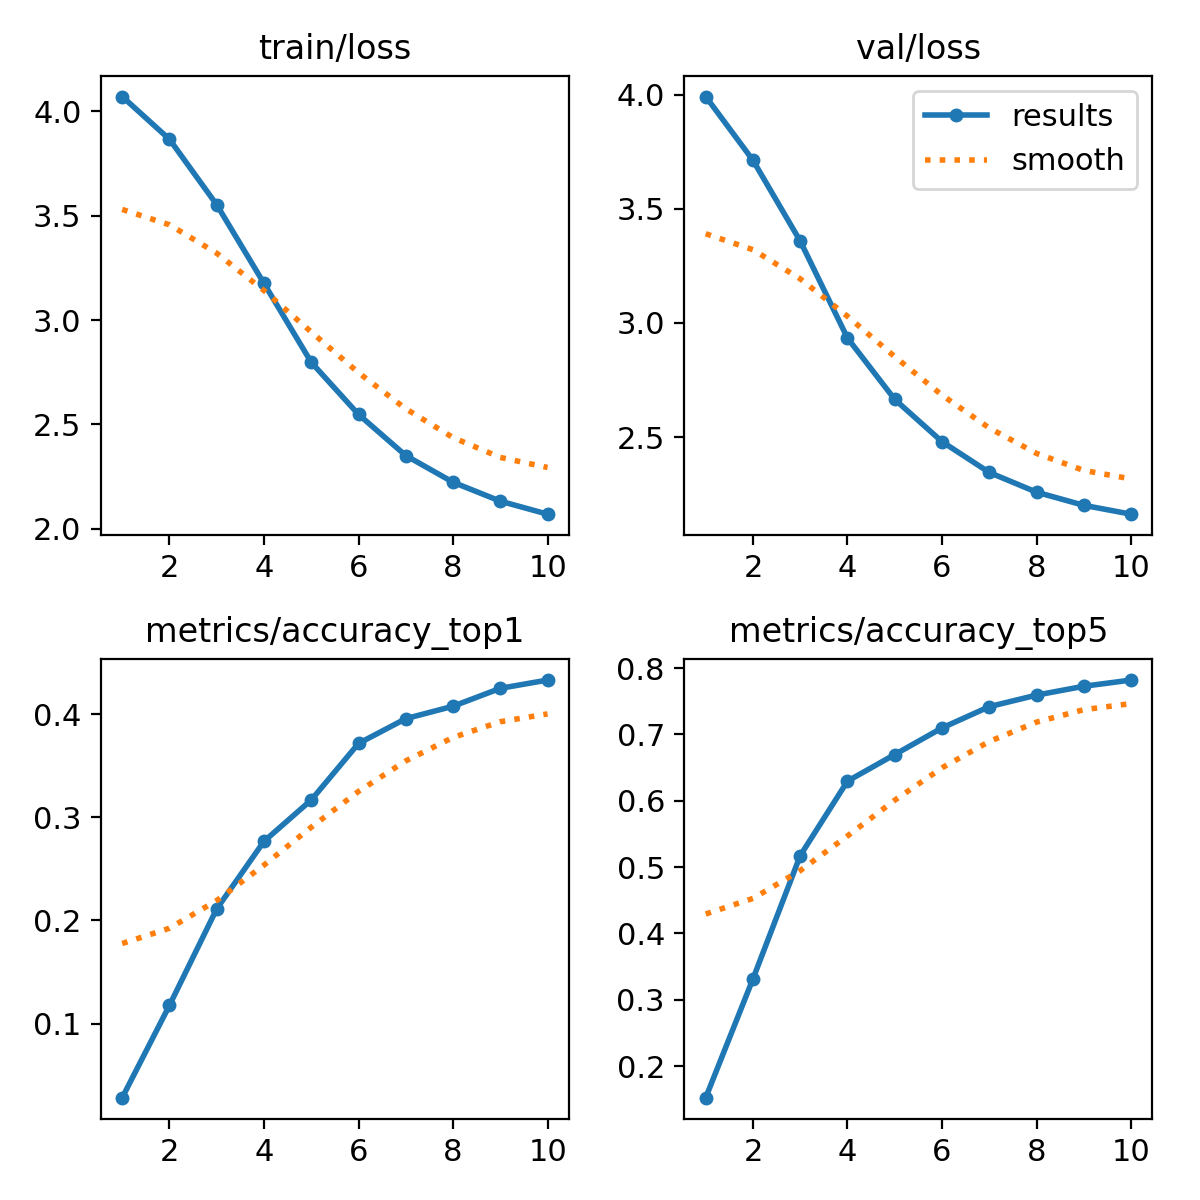

In [10]:
# After training, check results
from IPython.display import Image, display
results_dir = Path("runs/classify/yolov8s-cls_baseline")
display(Image(filename=results_dir / "results.png"))

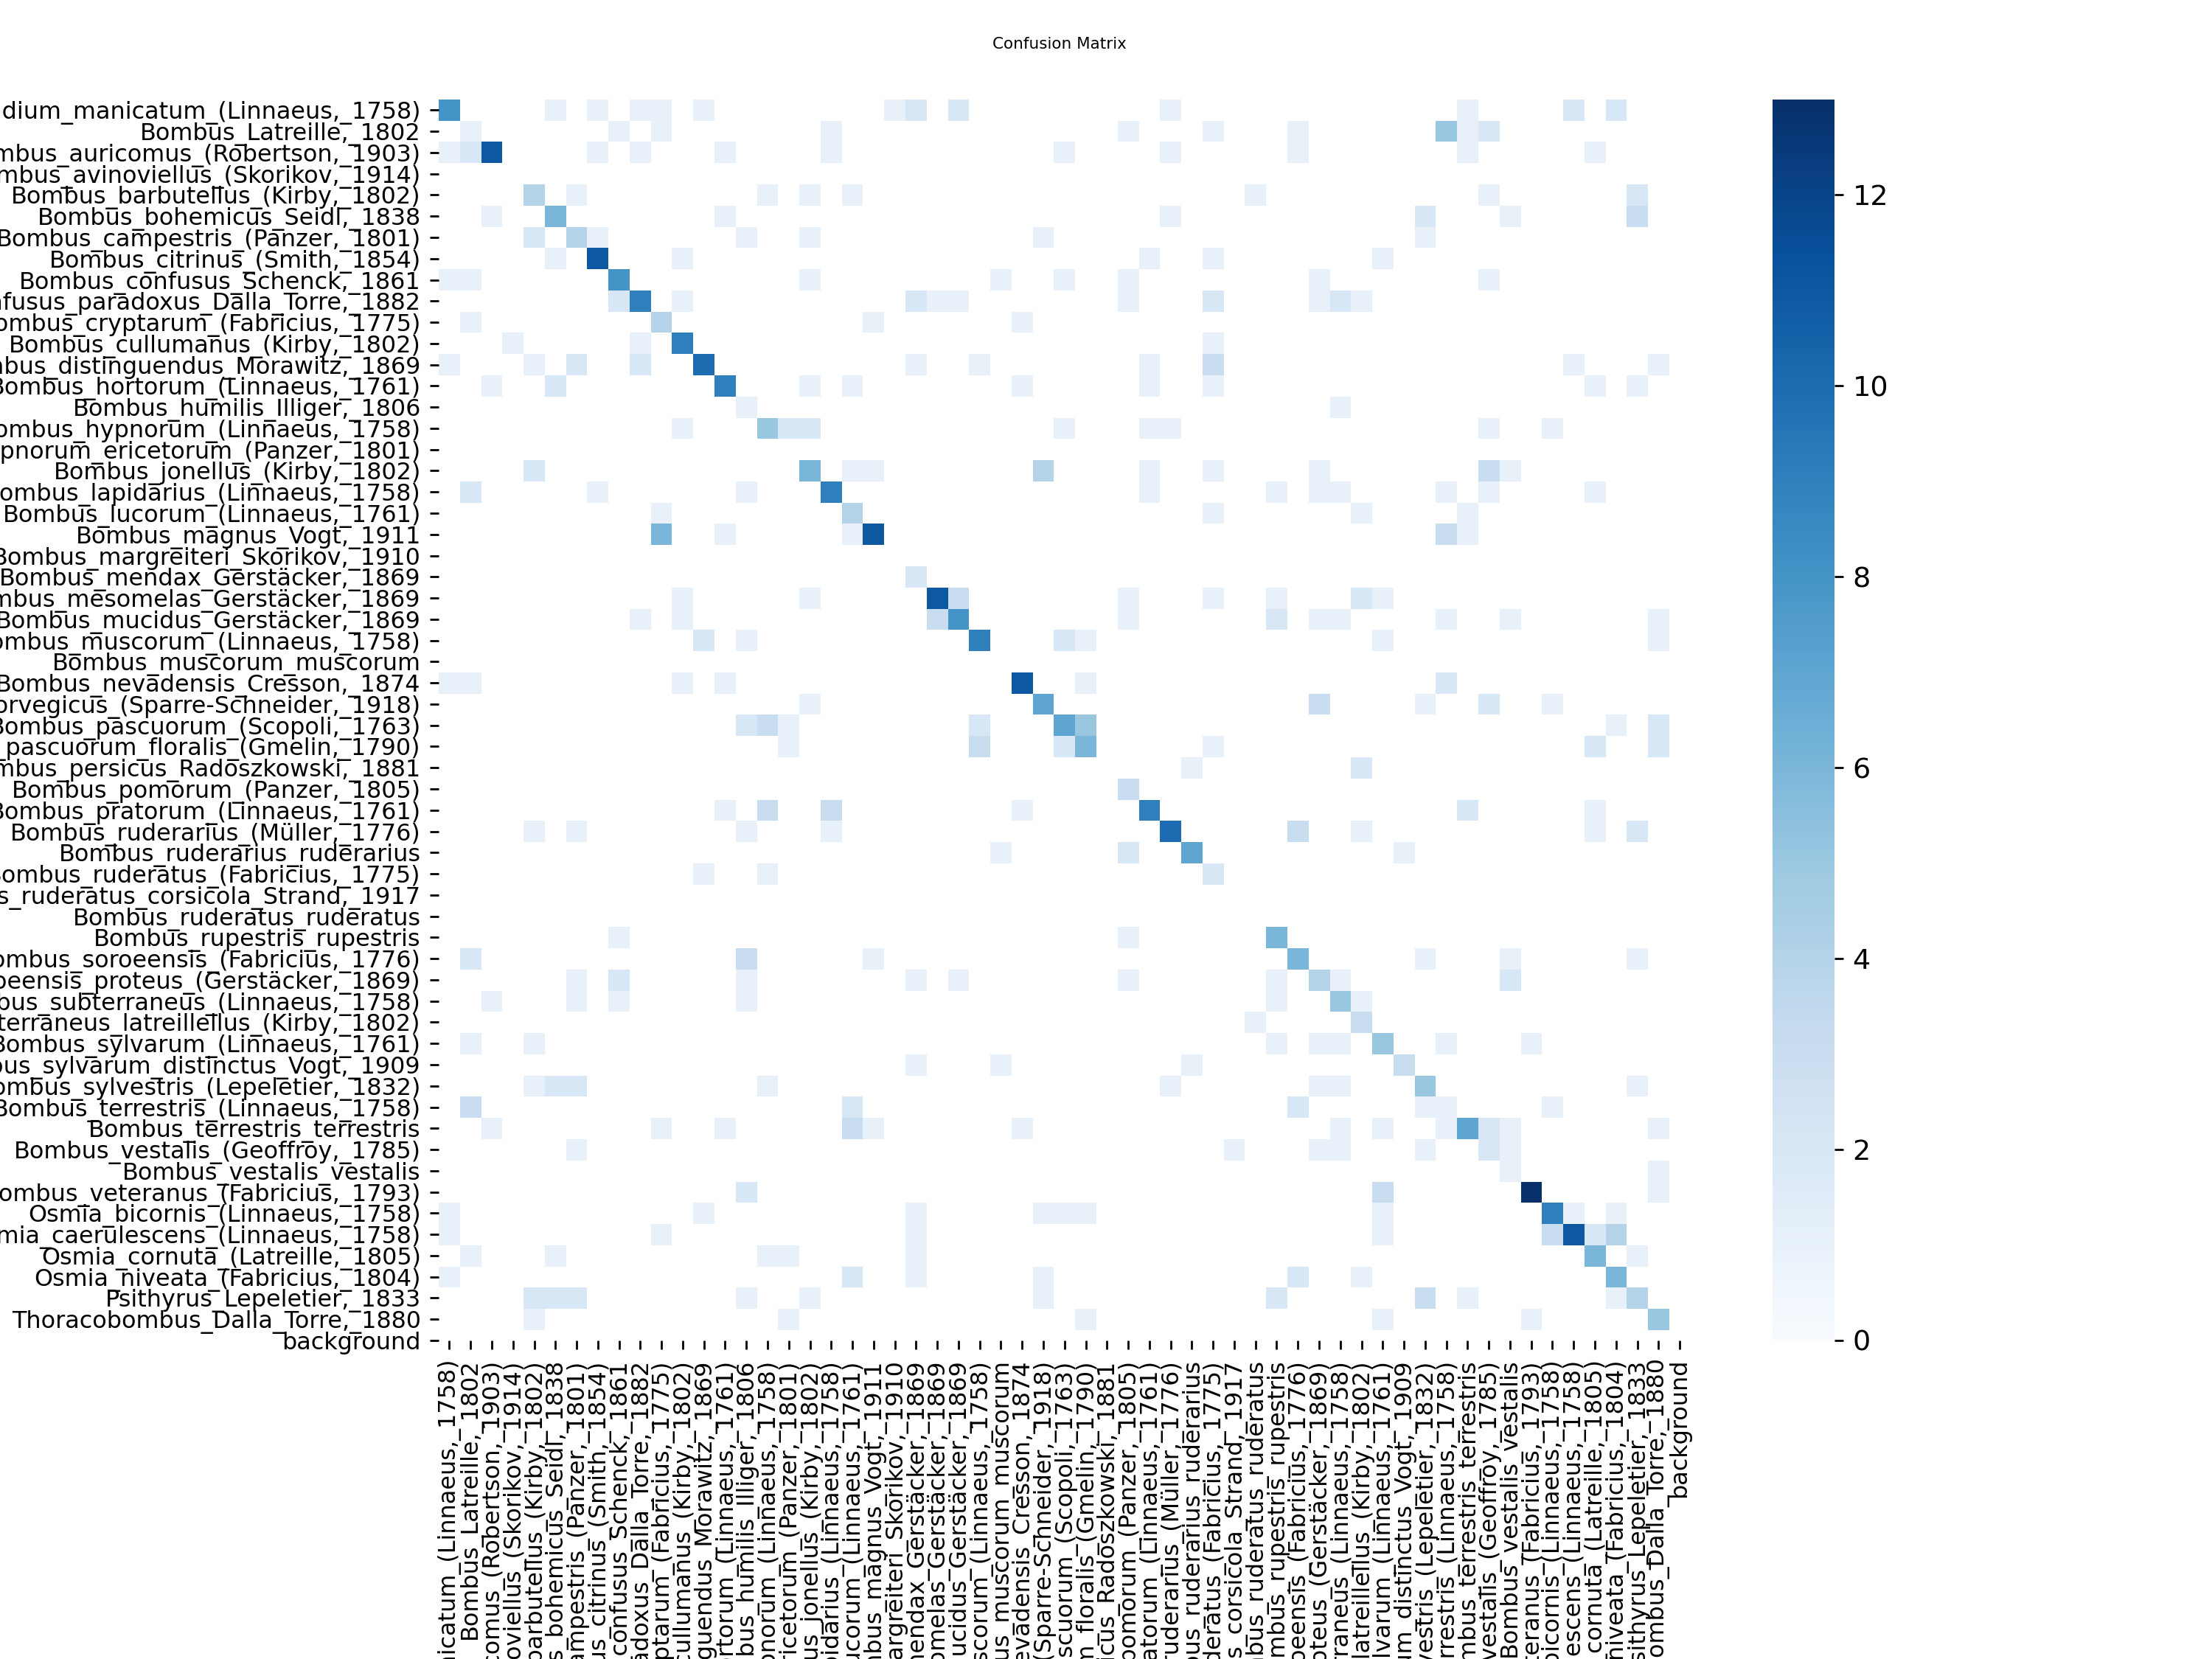

In [11]:
display(Image(filename=results_dir / "confusion_matrix.png"))

In [12]:
!cp /content/runs/classify/yolov8s-cls_baseline/results.csv /content/drive/MyDrive/Insect\ Detection/utils